### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


### Creating Functions

Creating several needed functions for the study : 
- get_stock_rates in order import stock exchange rates for a given company
- plotting functions to create linear plot of the stock price evolution 
- stock prediction functions

In [2]:
# def get_stock_rates(company_name):
#     """get the stock exchange rate for the given company from Yahoo! Finance for the studied period  
#     i.e. from 2010-01-01 to 2020-03-08
    
#     Input : the official company name, as quoted on the Stock Exchange 
#     Output : DataFrame of the given company's stock exchange price evolution with finance KPIs : 
#             Highest price, Lowest price, Opening Price, Closing Price, Volume of stocks 
#             + new column 'avg_price' i.e. average of the Highest & Lowest price of the day"""
    
#     df = web.DataReader(f'{company_name}', data_source='yahoo', start='2010-01-01', end='2020-03-08')
#     df['avg_price'] = df[['High','Low']].mean(axis=1)
#     df.to_csv(f'{company_name}_stocks_rate_2010-01-01_to_2020-03-08.csv')
#     df.head()
    
#     return df

## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [3]:
df_TSLA = pd.read_csv('../DataSets/Stocks_raw_data/TSLA_stocks_rate_2010-01-01_to_2020-03-08.csv', index_col='Date')

In [4]:
df_TSLA['PCT_change'] = df_TSLA['Adj Close'].pct_change(fill_method='ffill')

In [5]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


Adding PCT_change i.e. percetange change evolution from one day to another to measure the general trend of each day

In [6]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


In [7]:
df_TSLA.dtypes

High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Adj Close     float64
avg_price     float64
PCT_change    float64
dtype: object

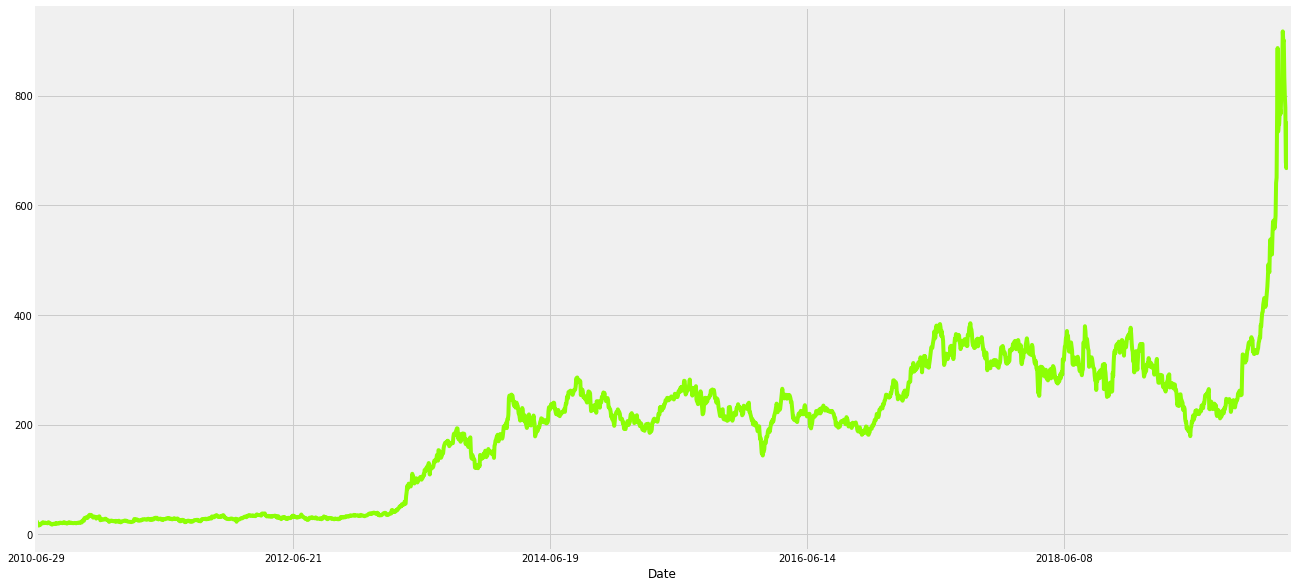

In [8]:
df_TSLA['Adj Close'].plot(figsize=(20,10), c=np.random.rand(3))

## 2 - Comparison of Car sales VS. Stock Price

### 2-1. Importing Competitor stocks

### 2-1. Comparison of Car Stock Values stocks

This section will compare various value of the previously imported value to measure how Tesla stocks evovle in comparison to other value

## 1 - Comparison of Car sales VS. Stock Price

In [38]:
df_Car_merged = pd.read_csv('../DataSets/Stocks_raw_data/df_car_companies_merged.csv')

In [39]:
df_Car_merged.tail(50)

,Date,Tesla_ADJ_Close,GM_ADJ_Close,Ford_ADJ_Close,Toyota_ADJ_Close,Nissan_ADJ_Close,VW_ADJ_Close
2511,2019-12-24,425.250000,36.139141,141.339996,141.339996,11.87,194.899994
2512,2019-12-26,430.940002,36.040344,141.529999,141.529999,11.59,193.699997
2513,2019-12-27,430.380005,36.119381,141.279999,141.279999,11.59,195.000000
2514,2019-12-30,414.700012,36.000824,140.610001,140.610001,11.54,192.000000
2515,2019-12-31,418.329987,36.158894,140.539993,140.539993,11.57,192.559998
2516,2020-01-02,430.260010,36.929497,142.240005,142.240005,11.64,199.750000
2517,2020-01-03,443.010010,35.882271,140.750000,140.750000,11.56,195.449997
2518,2020-01-06,451.540009,35.408058,140.770004,140.770004,11.56,195.000000
2519,2020-01-07,469.059998,34.726376,141.509995,141.509995,11.66,195.529999
2520,2020-01-08,492.140015,34.232399,141.160004,141.160004,11.68,194.649994


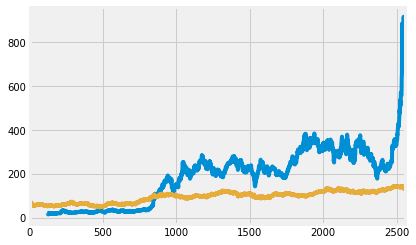

In [40]:
df_Car_merged['Tesla_ADJ_Close'].plot(label='Tesla')
df_Car_merged['Ford_ADJ_Close'].plot(label='Google')
df_Car_merged['Toyota_ADJ_Close'].plot(label='Apple')

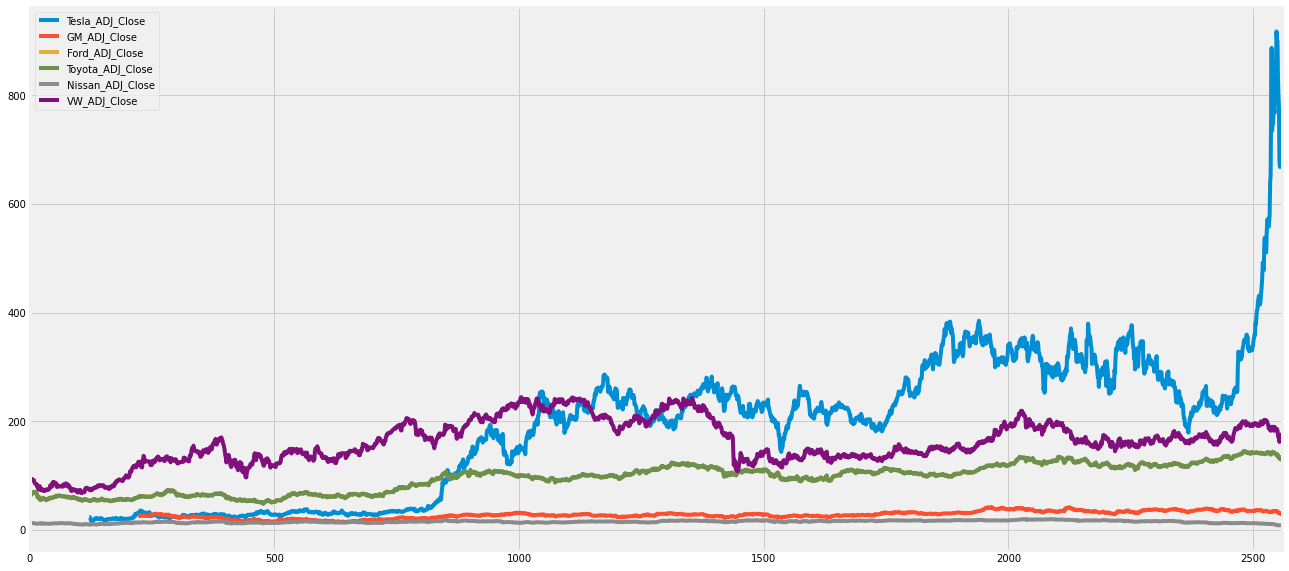

In [41]:
df_Car_merged.plot(figsize=(20,10))

Tesla has a stock evolution way higher than its competition, which makes its stock reading hard

### XXX-2. Importing GAFAM stocks

In [42]:
df_Tech_merged = pd.read_csv('../DataSets/Stocks_raw_data/df_Tech_merged.csv', index_col='Date')

In [43]:
df_Tech_merged

,Tesla_ADJ_Close,Google_ADJ_Close,Apple_ADJ_Close,FB_ADJ_Close,Amazon_ADJ_Close,Microsoft_ADJ_Close,Netflix_ADJ_Close,UBER_ADJ_Close
Date,,,,,,,,
2010-01-04,NaN,312.204773,26.538483,NaN,133.899994,24.294369,7.640000,NaN
2010-01-05,NaN,310.829926,26.584366,NaN,134.690002,24.302216,7.358572,NaN
2010-01-06,NaN,302.994293,26.161509,NaN,132.250000,24.153070,7.617143,NaN
2010-01-07,NaN,295.940735,26.113146,NaN,130.000000,23.901886,7.485714,NaN
2010-01-08,NaN,299.885956,26.286753,NaN,133.520004,24.066734,7.614286,NaN
2010-01-11,NaN,299.432648,26.054865,NaN,130.309998,23.760603,7.604286,NaN
2010-01-12,NaN,294.137512,25.758488,NaN,127.349998,23.603607,7.481429,NaN
2010-01-13,NaN,292.448822,26.121826,NaN,129.110001,23.823395,7.708571,NaN
2010-01-14,NaN,293.823669,25.970547,NaN,127.349998,24.302216,7.284286,NaN


In [44]:
df_Google = pd.read_csv('../DataSets/Stocks_raw_data/GOOG_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_fb = pd.read_csv('../DataSets/Stocks_raw_data/FB_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Microsoft = pd.read_csv('../DataSets/Stocks_raw_data/MSFT_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Amazon = pd.read_csv('../DataSets/Stocks_raw_data/AMZN_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Apple = pd.read_csv('../DataSets/Stocks_raw_data/AAPL_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Uber = pd.read_csv('../DataSets/Stocks_raw_data/UBER_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Nasdaq = pd.read_csv('../DataSets/Stocks_raw_data/^IXIC_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Netflix = pd.read_csv('../DataSets/Stocks_raw_data/NFLX_stocks_rate_2010-01-01_to_2020-03-08.csv')

In [45]:
#passing date column to datetime to plot later on

###To DO : make a FUNCTION
df_list_tech = [df_TSLA, df_Google,df_fb, df_Microsoft, df_Amazon,df_Apple, df_Uber, df_Nasdaq, df_Netflix]

for i in df_list:
    i['Date'] = pd.to_datetime(i['Date'])
    i.set_index('Date', inplace=True)

NameError: name 'df_list' is not defined

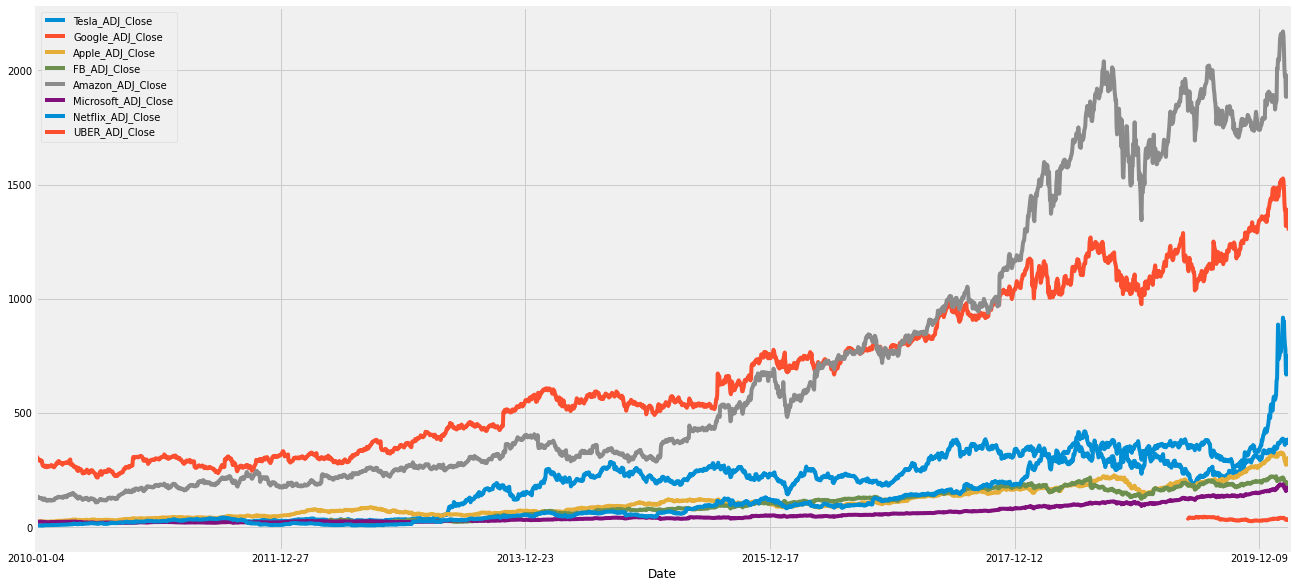

In [46]:
df_Tech_merged.plot(figsize=(20,10))

In [47]:
df_Microsoft.tail(50)

,Date,High,Low,Open,Close,Volume,Adj Close,avg_price
2511,2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,156.951309,157.415001
2512,2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,158.237793,158.064995
2513,2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,158.527008,158.885002
2514,2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,157.160736,157.875000
2515,2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,157.270432,157.110001
2516,2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,160.182480,159.529999
2517,2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,158.187927,159.004997
2518,2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,158.596817,157.805000
2519,2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,157.150772,158.495003
2520,2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,159.653915,159.375000


Measuring the correlation between each stock

In [48]:
corr_tech = df_Tech_merged.corr()

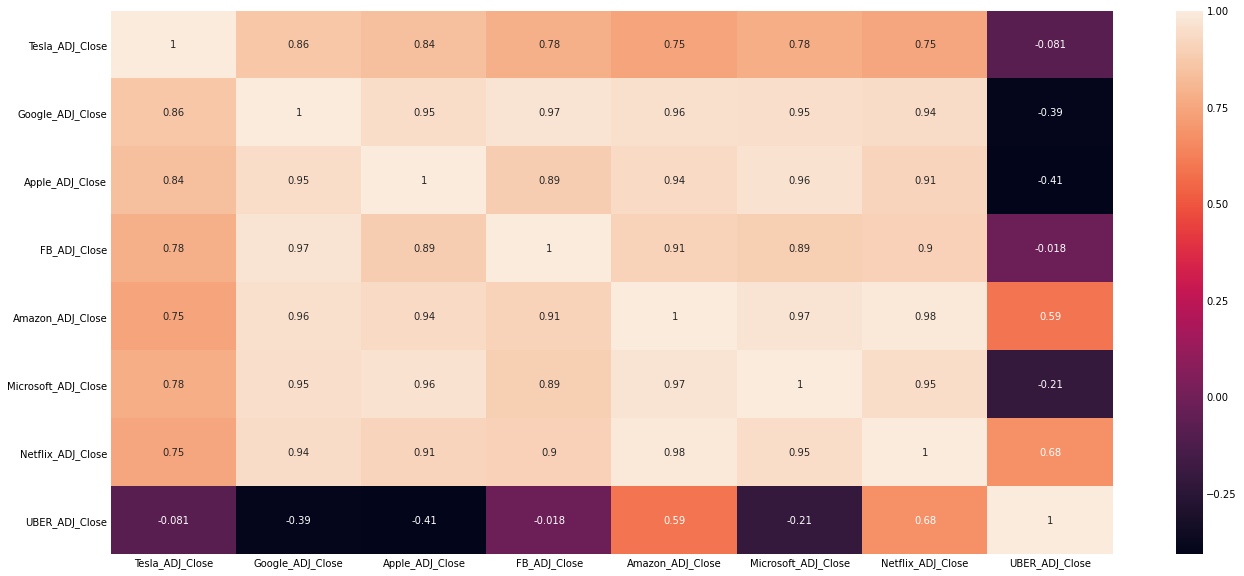

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_tech, annot=True)

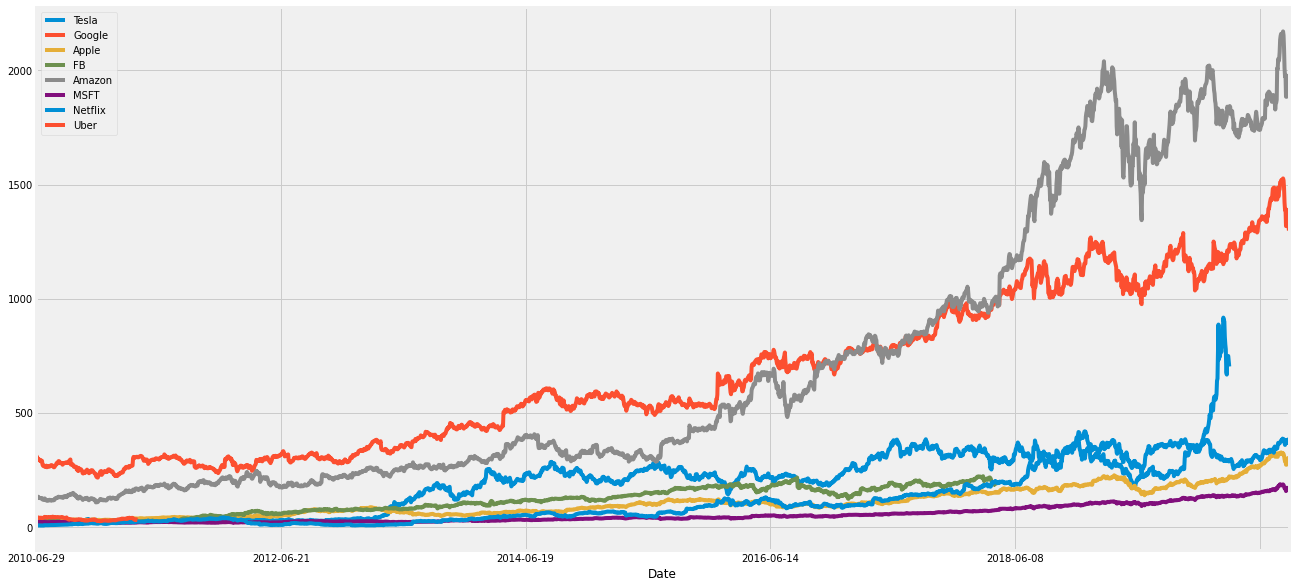

In [50]:
plt.fig = plt.figure(figsize=(20,10))
df_TSLA['Adj Close'].plot(label='Tesla')
df_Google['Adj Close'].plot(label='Google')
df_Apple['Adj Close'].plot(label='Apple')
df_fb['Adj Close'].plot(label='FB')
df_Amazon['Adj Close'].plot(label='Amazon')
df_Microsoft['Adj Close'].plot(label='MSFT')
df_Netflix['Adj Close'].plot(label='Netflix')
df_Uber['Adj Close'].plot(label='Uber')
plt.legend()
plt.show()

# Comparing Tesla to other car companies in terms of daily Volume of Stock trade

Importing competitors stock values into dataframes

In [51]:
df_Car_merged = pd.read_csv('../DataSets/Stocks_raw_data/df_car_companies_merged.csv', index_col='Date')

In [52]:
df_gm = pd.read_csv('../DataSets/Stocks_raw_data/GM_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_ford = pd.read_csv('../DataSets/Stocks_raw_data/F_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_toyota = pd.read_csv('../DataSets/Stocks_raw_data/TM_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_nissan = pd.read_csv('../DataSets/Stocks_raw_data/NSANY_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_VW = pd.read_csv('../DataSets/Stocks_raw_data/VLKAF_stocks_rate_2010-01-01_to_2020-03-08.csv')

In [53]:
# df_TSLA.reset_index(inplace=True)

In [54]:
#passing date column to datetime to plot later on

###To DO : make a FUNCTION
df_list = [df_TSLA, df_gm,df_ford, df_toyota, df_nissan, df_VW]

for i in df_list:
    i['Date'] = pd.to_datetime(i['Date'])
    i.set_index('Date', inplace=True)

KeyError: 'Date'

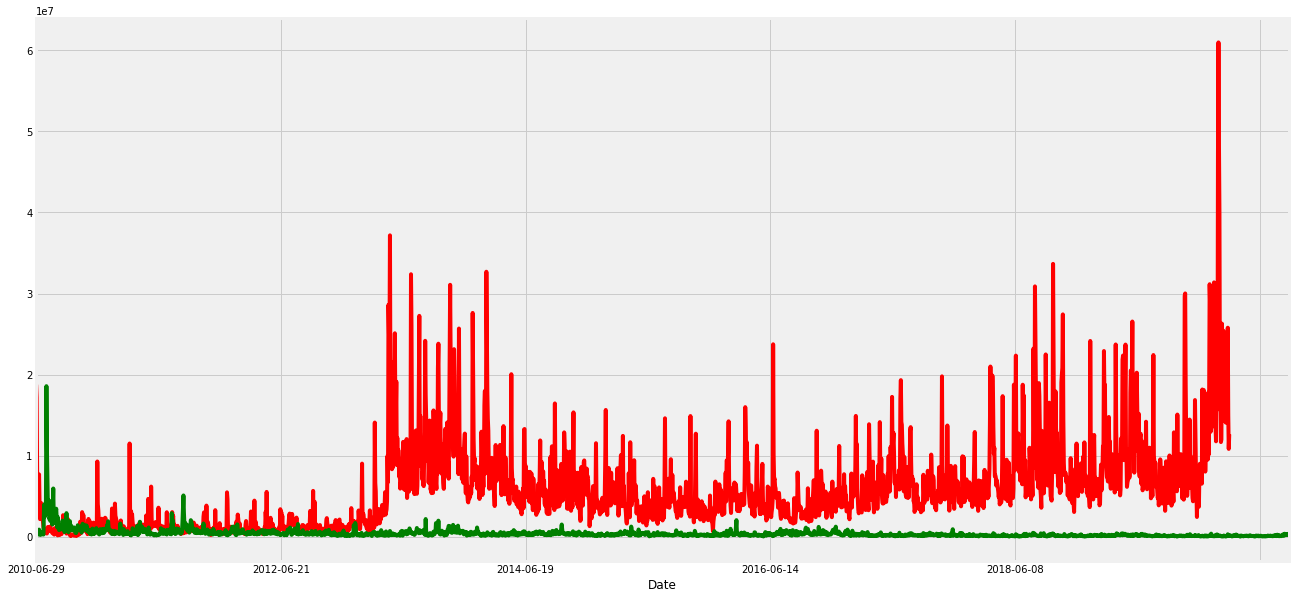

In [55]:
df_TSLA['Volume'].plot(c='r', figsize=(20,10))
# df_ford['Volume'].plot(c='b')
df_toyota['Volume'].plot(c='g')
# df_gm['Volume'].plot(c='y')
plt.show()

In [56]:
df_Car_merged

,Tesla_ADJ_Close,GM_ADJ_Close,Ford_ADJ_Close,Toyota_ADJ_Close,Nissan_ADJ_Close,VW_ADJ_Close
Date,,,,,,
2010-01-04,NaN,NaN,65.100243,65.100243,12.771317,NaN
2010-01-05,NaN,NaN,64.097885,64.097885,12.564291,91.029892
2010-01-06,NaN,NaN,64.916611,64.916611,12.357266,91.029892
2010-01-07,NaN,NaN,64.113190,64.113190,12.250185,91.029892
2010-01-08,NaN,NaN,65.620560,65.620560,12.528599,93.546852
2010-01-11,NaN,NaN,65.957222,65.957222,12.564291,93.966347
2010-01-12,NaN,NaN,68.482285,68.482285,12.649955,91.659142
2010-01-13,NaN,NaN,68.245087,68.245087,12.635680,91.659142
2010-01-14,NaN,NaN,69.576469,69.576469,12.535737,91.659142


In [57]:
corr_car = df_Car_merged.corr()

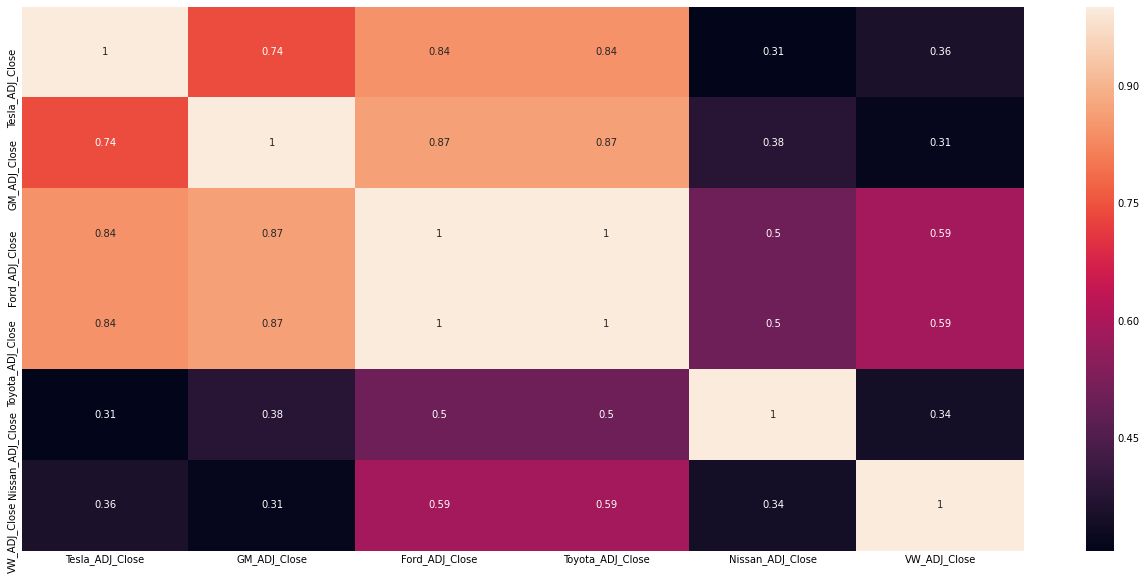

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_car, annot=True)

C:\Users\langl\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\langl\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\langl\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\langl\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EED6E157B8>,
      dtype=object)

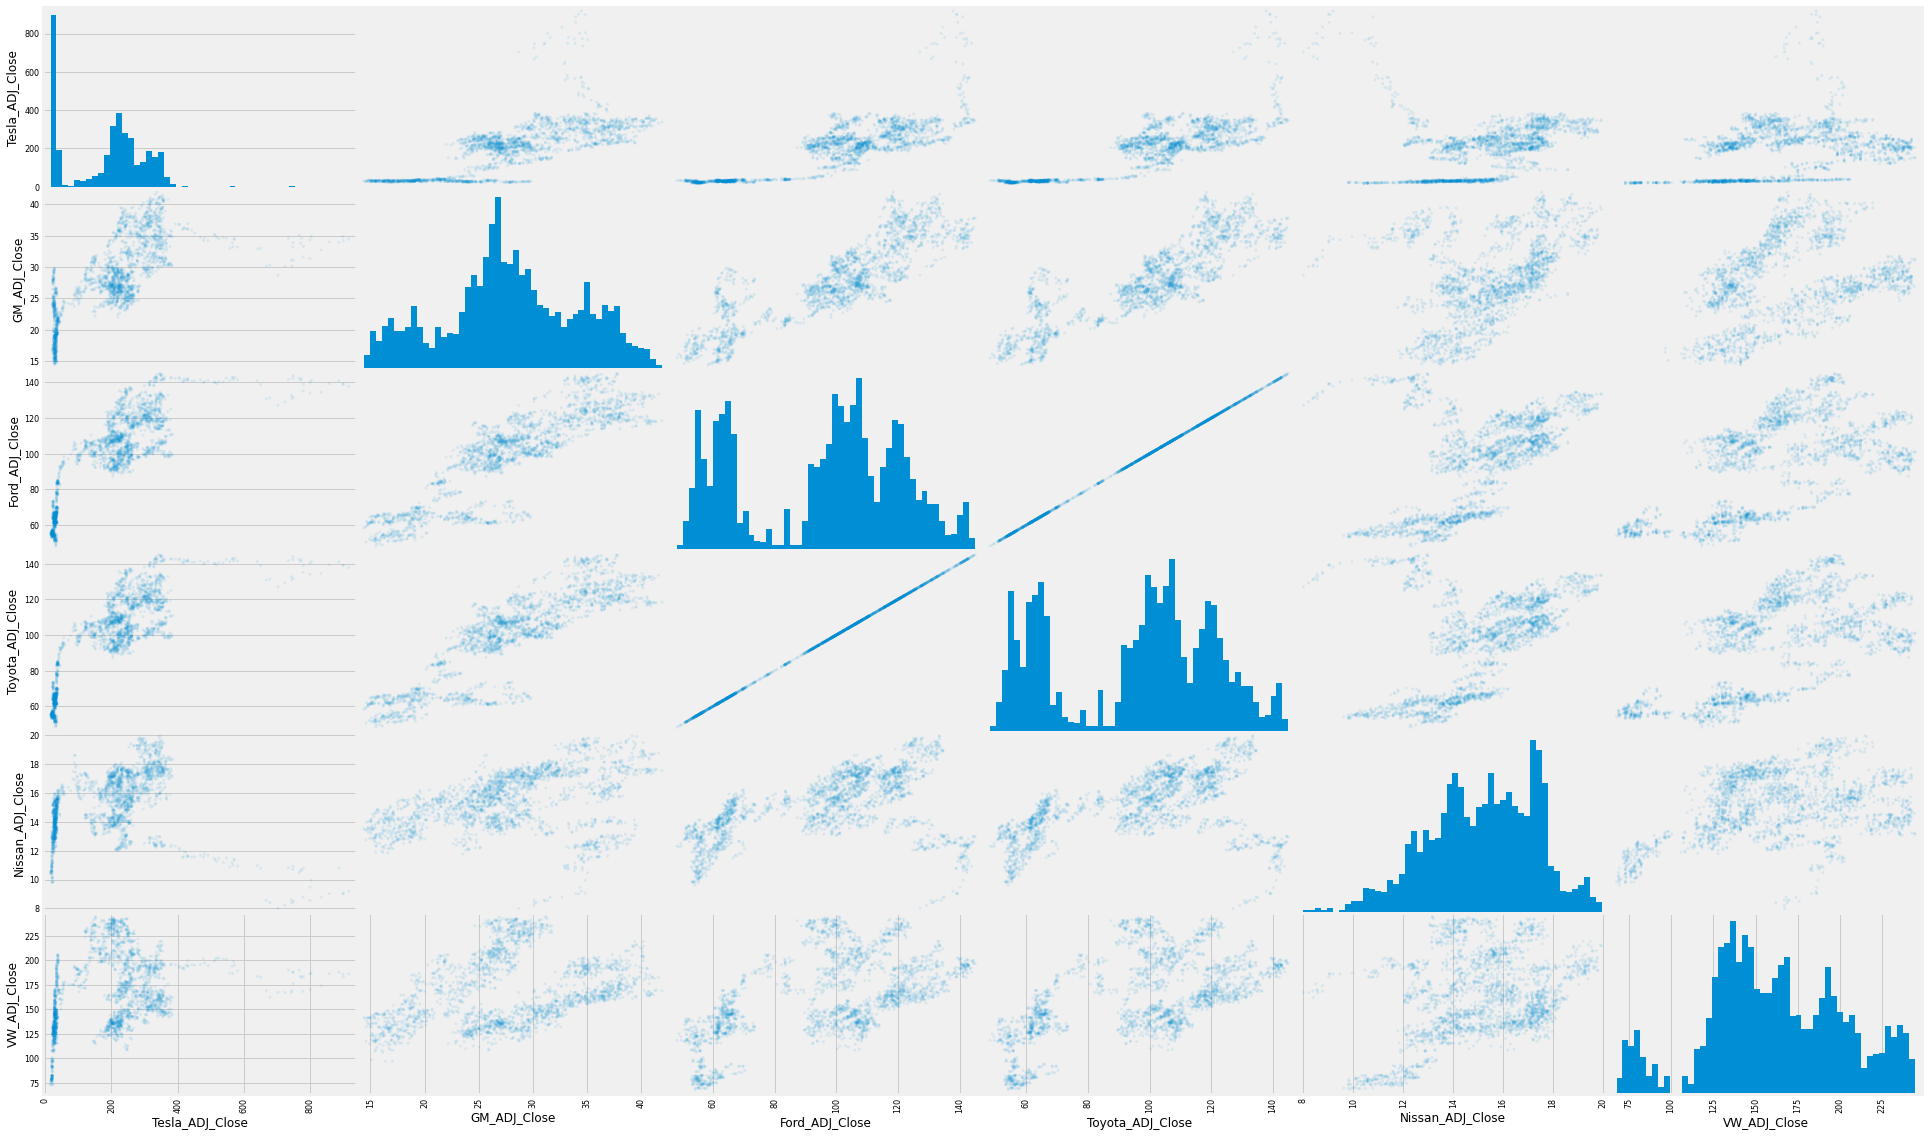

In [59]:
scatter_matrix(df_Car_merged, figsize=(30,20), alpha=0.1, hist_kwds={'bins':50})

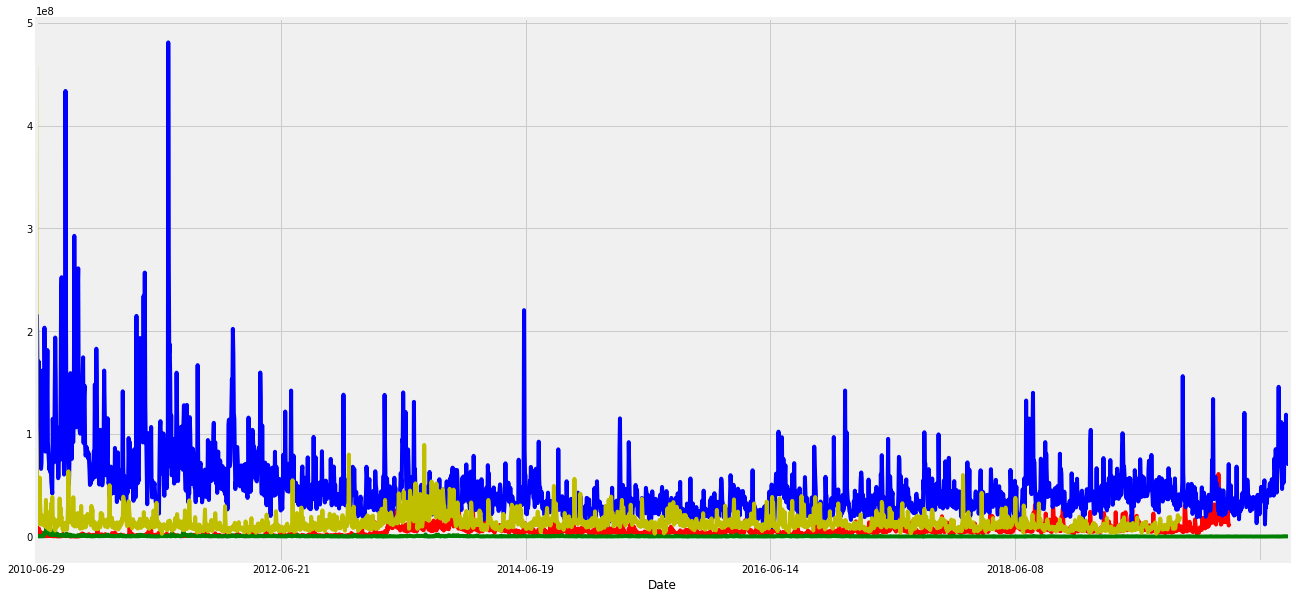

In [60]:
#On the 2015-2020 timeperiod
df_TSLA['Volume'].plot(c='r', figsize=(20,10))
df_ford['Volume'].plot(c='b')
df_toyota['Volume'].plot(c='g')
df_gm['Volume'].plot(c='y')
plt.show()